# Project Sharks

## Exploring & Cleaning

In [323]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import re


In [324]:
df = pd.read_csv ('./data/attacks.csv', encoding='unicode_escape')
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [325]:
df.isnull()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [326]:
df.notnull().sum() #cells with data--> 

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [327]:
list_col = list(df.columns)
print(list_col)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [328]:
#From the total number of rows, I'll delete the ones with less or none data whitin the columns.
#I discard the columns where the sum of notnull elements is too different from the rest
list_col_outliers=["Species", "Age", "Time","Unnamed: 22", "Unnamed: 23"] 
#I create a cleaned list of columns 
list_clean_outliers = [element for element in list_col if element not in list_col_outliers]
list_clean_outliers

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Injury',
 'Fatal (Y/N)',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order']

In [418]:
# I estimate a number of rows where most of the data is concentrated
df[list_clean_outliers].notnull().sum().mean()

6132.7

In [330]:
# I should keep about 6132 rows, so I'll remove the rest of them.
#In order to do that, I delete rows with more than 17 NaNs 
df_cleanNaN_Rows = df.copy()
df_cleanNaN_Rows.dropna(axis = 0, inplace = True, thresh=17)
df_cleanNaN_Rows

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [331]:
#Numbers of Rows I've left
df_cleanNaN_Rows.shape[0]

6167

In [332]:
# I check for the columns with insignificant amount of data to work with
df_cleanNaN_Rows.notnull().sum()

Case Number               6166
Date                      6167
Year                      6165
Type                      6164
Country                   6140
Area                      5791
Location                  5716
Activity                  5709
Name                      6030
Sex                       5689
Age                       3468
Injury                    6148
Fatal (Y/N)               5670
Time                      2946
Species                   3424
Investigator or Source    6151
pdf                       6167
href formula              6166
href                      6167
Case Number.1             6167
Case Number.2             6167
original order            6167
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [333]:
list_toCleanColNan= list(df_cleanNaN_Rows.columns)

In [334]:
#Create a list of the columns to delete
Col_toCleanNan = list([col for col in list_toCleanColNan if df_cleanNaN_Rows.notnull().sum()[col] < 3])  
Col_toCleanNan

['Unnamed: 22', 'Unnamed: 23']

In [335]:
# I drop those Columns
df_cleanNaN_Rows_Col = df_cleanNaN_Rows.copy()
df_cleanNaN_Rows_Col.dropna(axis = 1, inplace = True, thresh = 3)
df_cleanNaN_Rows_Col

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [336]:
df_cleanNaN_Rows_Col.drop(["original order", "href", "href formula", "pdf", "Investigator or Source", "Time" ], axis=1, inplace=True)
df_cleanNaN_Rows_Col

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark,2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",2018.06.04,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,ND.0005,ND.0005
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,ND.0004,ND.0004
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,ND.0003,ND.0003
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,ND.0002,ND.0002


In [337]:
df_cleanNaN_Rows_Col.shape[1]

16

In [17]:
#df_cleanNaN.T.duplicated(subset=None, keep='first').T



In [18]:
#df_cleanNaN_dup = df_cleanNaN.copy()
#df_cleanNaN_dup.drop_duplicates()

In [338]:
df_cleanNaN_Rows_Col["Case Number"] == df_cleanNaN_Rows_Col["Case Number.1"] #the columns "Case Number.1" and "Case Number" ARE EQUAL

0       True
1       True
2       True
3       True
4       True
        ... 
6297    True
6298    True
6299    True
6300    True
6301    True
Length: 6167, dtype: bool

In [339]:
df_cleanNaN_Rows_Col["Case Number"] == df_cleanNaN_Rows_Col["Case Number.2"] #the columns "Case Number.1" and "Case Number .2" ARE EQUAL

0       True
1       True
2       True
3       True
4       True
        ... 
6297    True
6298    True
6299    True
6300    True
6301    True
Length: 6167, dtype: bool

In [340]:
df_clean_dup=df_cleanNaN_Rows_Col.copy()
df_clean_dup.drop(["Case Number.2", "Case Number.1"], axis=1, inplace=True)


In [341]:
df_clean_dup.to_csv("../PandasProjectJoa/data/df1.csv", index= False)

In [342]:
df1 = pd.read_csv ('./data/df1.csv', encoding='unicode_escape')

In [343]:
df1.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
1719,2003.10.14,14-Oct-2003,2003.0,Unprovoked,USA,Florida,Near Patrick Air Force Base Brevard County,Surfing,male,M,19,Foot bitten,N,1.2 m [4'] shark
3844,1961.07.07.b,07-Jul-1961,1961.0,Provoked,AUSTRALIA,Queensland,Cape Moreton,Shark fishing,"35' motor launch, occupants: Bill Fulham & T. ...",NaN,NaN,"No injury to occupant, hooked shark bit boat's...",N,"White shark, 5.2 m [17'], 2500-lb"
5863,1862.06.03,03-Jun-1862,1862.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban Harbor,NaN,male,M,NaN,"""Very severe wounds""",N,NaN
218,2016.09.15.R,15-Sep-2016,2016.0,Boating,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN
2673,1989.02.02,02-Feb-1989,1989.0,Unprovoked,ITALY,Tyrrhenian Sea,"Golfo di Baratti, near Piombino (Tuscany)","Scuba diving, but swimming on surface",Luciano Costanzo,M,47,FATAL. His body not recovered,Y,6 m [20'] white shark


## Analyzing

### _Checking the number of cases for every country to prioritize those with the greatest impact_

In [344]:
country_dict = df1["Country"].value_counts().to_dict()
country_dict

{'USA': 2223,
 'AUSTRALIA': 1327,
 'SOUTH AFRICA': 574,
 'PAPUA NEW GUINEA': 131,
 'NEW ZEALAND': 125,
 'BRAZIL': 111,
 'BAHAMAS': 108,
 'MEXICO': 85,
 'ITALY': 68,
 'FIJI': 60,
 'PHILIPPINES': 58,
 'REUNION': 57,
 'NEW CALEDONIA': 49,
 'MOZAMBIQUE': 45,
 'CUBA': 44,
 'SPAIN': 42,
 'EGYPT': 38,
 'INDIA': 36,
 'JAPAN': 33,
 'PANAMA': 32,
 'CROATIA': 31,
 'SOLOMON ISLANDS': 29,
 'IRAN': 29,
 'FRENCH POLYNESIA': 25,
 'HONG KONG': 24,
 'JAMAICA': 23,
 'INDONESIA': 22,
 'GREECE': 22,
 'ENGLAND': 21,
 'COSTA RICA': 17,
 'ATLANTIC OCEAN': 16,
 'TONGA': 15,
 'VIETNAM': 14,
 'MARSHALL ISLANDS': 13,
 'VANUATU': 13,
 'PACIFIC OCEAN': 13,
 'SRI LANKA': 13,
 'BERMUDA': 13,
 'IRAQ': 12,
 'TURKEY': 12,
 'CANADA': 12,
 'VENEZUELA': 11,
 'FRANCE': 11,
 'UNITED KINGDOM': 11,
 'MAURITIUS': 10,
 'SOUTH ATLANTIC OCEAN': 10,
 'KENYA': 10,
 'TAIWAN': 9,
 'ECUADOR': 9,
 'SENEGAL': 9,
 'MADAGASCAR': 8,
 'NEW GUINEA': 8,
 'SOUTH KOREA': 8,
 'COLUMBIA': 8,
 'CHILE': 8,
 'SCOTLAND': 8,
 'NORTH PACIFIC OCEAN': 7,


In [345]:
sum =0
new_dict={}
for country,num in country_dict.items():
    if sum <  df1["Country"].value_counts().sum():
        sum+=num
        new_dict[country]=num


In [346]:
new_dict1={}
new_dict1["Country"] = list(new_dict.keys())

In [408]:
df_comp1 = pd.DataFrame(new_dict1)

list_perc=[]
list_acc_perc=[]
perc=0
y=0


for x in list(new_dict.values()):
    perc = round((x/(df1["Country"].value_counts().sum())) * 100,2)
    y+=perc
        list_perc.append(perc)
    list_acc_perc.append(y)
    

df_comp1['Values'] = list(new_dict.values())
df_comp1['%'] = list_perc
df_comp1['CUMULATIVE %'] = list_acc_perc



In [348]:
df_comp1.to_csv("../PandasProjectJoa/data/comp1.csv", index= False)

In [349]:
df_comp2 = df_comp1.copy()
df_comp2 = df_comp2.loc[df_comp2 ['Values'] > 40]
df_comp2

,Country,Values,%,CUMULATIVE %
0,USA,2223,36.21,36.21
1,AUSTRALIA,1327,21.61,57.82
2,SOUTH AFRICA,574,9.35,67.17
3,PAPUA NEW GUINEA,131,2.13,69.30
4,NEW ZEALAND,125,2.04,71.34
5,BRAZIL,111,1.81,73.15
6,BAHAMAS,108,1.76,74.91
7,MEXICO,85,1.38,76.29
8,ITALY,68,1.11,77.40
9,FIJI,60,0.98,78.38


C:\Users\Usuario\AppData\Local\Temp\ipykernel_40220\1724214943.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



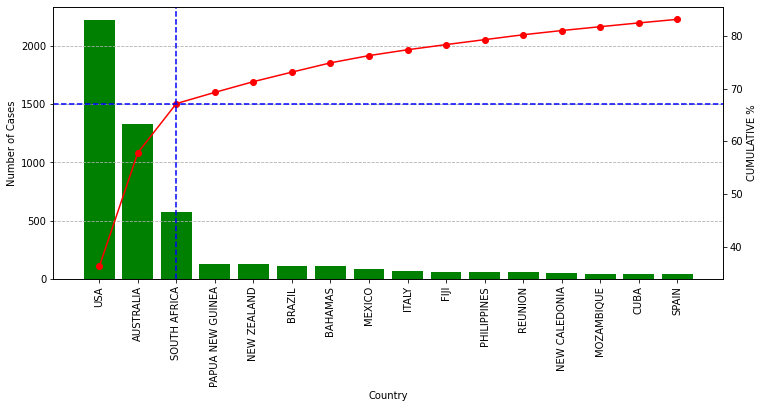

In [350]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

labels = list(df_comp2['Country'])
ax.set_xlabel('Country')
ax.set_xticklabels(labels=labels,rotation=90);

ax.bar(df_comp2['Country'], df_comp2['Values'], color='green')
ax2.plot(df_comp2['Country'], df_comp2['CUMULATIVE %'], color='red', marker='o')

ax.set_ylabel('Number of Cases')
ax2.set_ylabel('CUMULATIVE %')

ax.yaxis.grid(linestyle='dashed')

plt.axhline(y = 67, color = 'b', linestyle = '--')
plt.axvline(x = "SOUTH AFRICA", color = 'b', linestyle = '--', label = 'axvline - full height')



plt.show()

In [407]:
fig.savefig('../PandasProjectJoa/images/comparison chart.jpg', bbox_inches='tight', dpi=150)

In [351]:
df_study = df1.copy()


### I'll be analyzing from the year 2008

In [419]:
df_study_1 = df_study.copy()
df_study_1 = df_study_1[df_study_1["Year"].notna()]  #erase Nan's for Year
df_study_1.Year = df_study_1.Year.astype(int) #convert the data type of “Year” column from “float” to “int”. 
df_study_1 = df_study_1[df_study_1['Year'] >= 2008]
df_study_1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2008.01.19.R,Reported 19-Jan-2008,2008,Invalid,NEW ZEALAND,South Island,Marfells Beach,Wading,Matthew O'Neill,M,NaN,"Stingray envenomation, not a shark",NaN,No shark involvement
1292,2008.01.14,14-Jan-2008,2008,Boat,NEW ZEALAND,North Island,Omaha Beach,Attempting to chase shark out to sea,inflatable rescue boat. Occupants: Lauren John...,NaN,NaN,"No injury to occupants, pontoon punctured",N,"Bronze whaler shark, 4m"
1293,2008.01.10,10-Jan-2008,2008,Unprovoked,USA,Florida,"Playalinda Beach, Canaveral National Seashore,...",Surfing,Jordan Marsden,M,20,Left foot bitten,N,a small shark
1294,2008.00.00.b,Fall 2008,2008,Provoked,USA,Florida,"Off Fort Pierce, St. Lucie County",Fishing for snapper,Johnny Silva,M,NaN,Minor injury to hand by hooked shark PROVOKE...,N,"Nurse shark, 10'"


### 67% of the cases occurred in USA, Australia and South Africa

In [353]:
cond_1 = df_study_1['Country'] == "USA"
cond_2 = df_study_1['Country'] == "AUSTRALIA" 
cond_3 = df_study_1['Country'] == "SOUTH AFRICA" 

 _Work in the dataframe in order to organize info by months and years_

In [382]:
df2 = df1.copy()
df2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN
6163,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN
6164,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN
6165,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ÂºN, 79ÂºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN


In [383]:
df2["Month"] = df1["Date"].str.extract(r"\b(\D{3})\b")

In [384]:
list_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
df2["Month"] = df2["Month"].apply(lambda x: x if x in list_months else np.nan)
df2["Month"]

0       Jun
1       Jun
2       Jun
3       Jun
4       Jun
       ... 
6162    NaN
6163    NaN
6164    NaN
6165    NaN
6166    NaN
Name: Month, Length: 6167, dtype: object

In [385]:
df2 = df2[df2["Month"].notna()]#erase Nan's for Month

In [386]:
df2["Month"].sample(10)

3256    Dec
392     Jul
318     Jan
3131    Dec
203     Oct
5033    Feb
3234    Jun
4895    Feb
5198    Sep
3799    Jan
Name: Month, dtype: object

fig2 = go.Figure(data=[go.Bar(name="Female", x=animals, y=agrupado.Female),
    go.Bar(name="Male", x=animals, y=agrupado.Male)
])

#Changing the type of the bars
fig.update_layout(barmode="stack")
fig.show()


In [387]:
df3 = df2.copy()

In [388]:
df3["Month"] = pd.Categorical(df3["Month"], categories=list_months, ordered=True)
df3.sort_values(by="Month",inplace=True)
df3.reset_index()
df3['Month']

3671    Jan
5130    Jan
5129    Jan
5128    Jan
5112    Jan
       ... 
465     Dec
466     Dec
5587    Dec
831     Dec
4793    Dec
Name: Month, Length: 5635, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [389]:
df3= df3[df3["Year"].notna()]  #erase Nan's for Year

In [390]:
df3.Year = df3.Year.astype(int) #convert the data type of “Year” column from “float” to “int”. 
df3.sort_values(by="Year",inplace=True)
df33 = df3.sort_values(by = ['Year', 'Month'], ascending =False)
df33

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Month
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,Jun
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,NaN,Jun
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,Jun
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark,Jun
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111,ND.0060,Before 19-Jun-1959,0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,"White shark, 1,900-lb",Jun
6073,ND-0115,Before 08-Jun-1912,0,Unprovoked,NEW ZEALAND,North Island,"Point Halsey, Wellington",NaN,Kai-tawaro,M,NaN,FATAL,Y,NaN,Jun
6112,ND.0059,Before 24 Apr-1959,0,Unprovoked,BERMUDA,Paget,Paget Parish,Spearfishing,Ross Doe,M,NaN,Shoulder abraded by skin of shark,N,NaN,Apr
6123,ND.0047,Before Mar-1956,0,Unprovoked,NORTH PACIFIC OCEAN,NaN,Wake Island,"Fishing, wading with string of fish",male,M,NaN,Survived,N,NaN,Mar


In [391]:
df4 = df3.copy()
df4 = df4[df4['Year']> 2007]
df4["Month"] = pd.Categorical(df4["Month"], categories=list_months, ordered=True)
df4.sort_values(by="Month",inplace=True)
df4.reset_index()
          


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Month
0,949,2011.01.26,26-Jan-2011,2011,Unprovoked,BAHAMAS,West End,Tiger Beach,Scuba diving,Jim Abernethy,M,55,Arm bitten,N,Caribbean reef shark,Jan
1,456,2015.01.17,17-Jan-2015,2015,Boating,AUSTRALIA,New South Wales,Off Blacksmith Beach,Fishing,Boat: occupants: Tim Watson & Allan de Sylva,M,NaN,"Shark bumped boat, no injury to occupants",N,5 m shark,Jan
2,315,2016.01.23,23-Jan-2016,2016,Unprovoked,USA,Hawaii,"Wailea Beach, Maui",Paddle boarding,Matt Mason,M,48,No injury,N,"Tiger shark, 14'",Jan
3,584,2014.01.25,25-Jan-2014,2014,Unprovoked,NEW ZEALAND,South Island,Garden Bay near Cosy Nook,Spearfishing,James Grant,M,24,Minor injury to left lower leg & heel,N,7-gill shark,Jan
4,1044,2010.01.30,31-Jan-2010,2010,Unprovoked,BRAZIL,Rio Grande Do Sul,"Atlantis Beach, near Tramandai",Surfing,Andrei Johann,M,29,Foot bitten,N,Thought to involve a juvenile hammerhead shark,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,320,2015.12.25,25-Dec-2015,2015,Unprovoked,SPAIN,Grand Canary Island,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,Cristina Ojeda-Thies,F,38,Lacerations to left forearm,N,"Silky shark, 6.5'",Dec
1278,323,2015.12.21.a,21-Dec-2015,2015,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,MÃ¡rcio de Castro Palma,M,32,Right hand & part of forearm removed,N,"Tiger shark, 1.5 m",Dec
1279,324,2015.12.19,19-Dec-2015,2015,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,Dec
1280,466,2014.12.28.b,28-Dec-2014,2014,Unprovoked,USA,California,"MontaÃ±a de Oro State Park, San Luis Obispo Co...",Surfing,Kevin Swanson,M,50,Injury to hip/leg,N,"White shark, 8' to 10'",Dec


## Conclusions

## USA

In [392]:
df_study_USA = df_study_1[cond_1]


In [411]:
data1= list(df_study_USA['Activity'].value_counts()[:10])
keys1 = df_study_USA['Activity'].value_counts()[:10].index
keys1

Index(['Surfing', 'Swimming', 'Wading', 'Fishing', 'Standing', 'Spearfishing',
       'Snorkeling', 'Body surfing', 'Boogie boarding', 'Kayaking'],
      dtype='object')

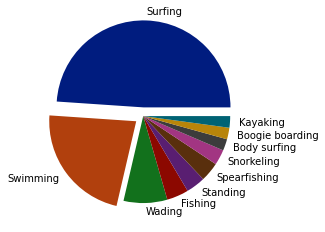

In [415]:
palette_color = sns.color_palette('dark')
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(data1, labels=keys1, explode =explode, colors=palette_color)
plt.show()

#### surfers and swimmers are the most affected by shark attacks in USA

In [398]:
hist_USA = px.histogram(df4[df4['Country']=="USA"], x="Month", width=600, height=400, title="USA")
hist_USA.show()

_The worst months to do water activities in the USA are from June to October (SUMMER)_

## AUSTRALIA

In [376]:
df_study_AUS = df_study_1[cond_2]

In [377]:
data2= list(df_study_AUS['Activity'].value_counts()[:10])
keys2 = df_study_AUS['Activity'].value_counts()[:10].index

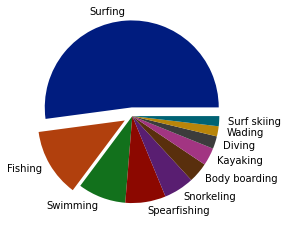

In [416]:
palette_color = sns.color_palette('dark')
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(data2, labels=keys2, explode=explode, colors=palette_color)
plt.show()

#### surfers and fishermen are the most affected by shark attacks in Australia

In [406]:
hist_AUS = px.histogram(df4[df4['Country']=="AUSTRALIA"], x="Month", width=400, height=300, title="AUSTRALIA")
hist_AUS.show()

_The worst months to do water activities in the USA are from October to March (SUMMER)_

## SOUTH AFRICA

In [379]:
df_study_SouthA = df_study_1[cond_3]

In [380]:
data3= list(df_study_SouthA['Activity'].value_counts()[:10])
keys3 = df_study_SouthA['Activity'].value_counts()[:10].index

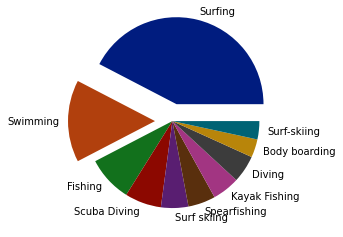

In [417]:
palette_color = sns.color_palette('dark')
explode = [0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(data3, labels=keys3, explode=explode, colors=palette_color)
plt.show()

#### surfers and swimmers are the most affected by shark attacks in South Africa

In [405]:
hist_SouthA = px.histogram(df4[df4['Country']=="SOUTH AFRICA"], x="Month", width=400, height=300, title="SOUTH AFRICA")
hist_SouthA.show()

_The worst months to do water activities in the USA are from December to April ( SUMMER - AUTUMN)_